<a href="https://colab.research.google.com/github/ucfilho/Raianars_paper_one_revisited/blob/main/After_asked_reviews_one_2022/Hybrid_cec2014_D_30/C_Frannk_F30_cec2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz
import Go2Ann
from pandas import read_csv

fatal: destination path 'optim_raianars_Insight' already exists and is not an empty directory.
/content/optim_raianars_Insight


In [2]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

fatal: destination path 'Raianars_paper_One' already exists and is not an empty directory.
/content/optim_raianars_Insight/Raianars_paper_One


In [3]:
#import Go2Ann
#import de_soma_Insight
#import de_bounds_matriz
#import Function
import Go2MinMax
from AvaliaX import AvaliaX
#from Function import FUN
#from Function import Function.FUN
#from Function import Function.Fun
#from Function import Function
from GeraIndices import GeraIndices
import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=1000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100
mut=0.5
crossp=0.5

#fator = 1.0/3.0; 
Fi=mut;CRi=crossp;# para impressão
fator = 1.0/3.0; 
mut2=0.5;crossp2=0.5;mut3=0.75;crossp3=0.25;mut4=0.25;crossp4=0.25;


In [4]:
def load_shift_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values.reshape((-1))

def load_matrix_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values

In [5]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz

fatal: destination path 'optim_raianars_Insight' already exists and is not an empty directory.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight


In [6]:
#!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
#%cd Raianars_paper_One

!git clone https://github.com/ucfilho/Raianars_Routines #clonar do Github
%cd Raianars_Routines

fatal: destination path 'Raianars_Routines' already exists and is not an empty directory.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines


In [7]:
!git clone https://github.com/ucfilho/functions_cec2014_data
%cd functions_cec2014_data
import F1_to_F27_cec2014_zero_to_hero
import cec2014_names
import cec2014_shift_rotate

fatal: destination path 'functions_cec2014_data' already exists and is not an empty directory.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data


In [8]:
function_select = 'F30'

problem_size = 30 # possibles 2, 10, 20, 30, 50, 100

In [9]:
dim = problem_size 

In [10]:
!pip install --upgrade --no-cache-dir gdown

In [11]:
# !gdown --id 1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz
# https://drive.google.com/file/d/1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz/view?usp=sharing
!gdown --id 1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz
To: /content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/cec2014.zip
100% 36.1M/36.1M [00:00<00:00, 311MB/s]


In [12]:
import zipfile
file_name = zipfile.ZipFile('cec2014.zip', 'r')
file_name.extractall()

In [13]:
def load_shift_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values.reshape((-1))

def load_matrix_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values

In [14]:

Function_CEC2014 =function_select + "_" + cec2014_names.NamesFunctions()[function_select]+"_D_"+str(problem_size)

f_matrix = "M_"+function_select[1:]+"_D"+str(problem_size) + ".txt"
shift_data_file="shift_data_"+function_select[1:]+".txt"
shift_data = load_shift_data__(shift_data_file)[:problem_size]
matrix = load_matrix_data__(f_matrix)
f_shuffle = "shuffle_data_"+function_select[1:]+"_D"+str(problem_size) + ".txt"
shuffle = (load_shift_data__(f_shuffle)[:problem_size] - np.ones(problem_size)).astype(int)

f12_hgbat__ = F1_to_F27_cec2014_zero_to_hero.f12_hgbat__ 
f3_discus__ = F1_to_F27_cec2014_zero_to_hero.f3_discus__ 
f13_expanded_griewank__ = F1_to_F27_cec2014_zero_to_hero.f13_expanded_griewank__ 
f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__ 


f14_expanded_scaffer__ = F1_to_F27_cec2014_zero_to_hero.f14_expanded_scaffer__ 
#f12_hgbat__ = F1_to_F27_cec2014_zero_to_hero.f12_hgbat__
f4_rosenbrock__ = F1_to_F27_cec2014_zero_to_hero.f4_rosenbrock__
f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__
f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__  

f10_katsuura__ = F1_to_F27_cec2014_zero_to_hero.f10_katsuura__
f11_happy_cat__ = F1_to_F27_cec2014_zero_to_hero.f11_happy_cat__
#f13_expanded_griewank__ = F1_to_F27_cec2014_zero_to_hero.f13_expanded_griewank__
#f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__
f5_ackley__ = F1_to_F27_cec2014_zero_to_hero.f5_ackley__ 

# block of functions to F30: it use F20, F21, F22
f_matrix = "M_20"+"_D"+str(problem_size) + ".txt"
matrix_F20 = load_matrix_data__(f_matrix)
f_matrix = "M_21"+"_D"+str(problem_size) + ".txt"
matrix_F21 = load_matrix_data__(f_matrix)
f_matrix = "M_22"+"_D"+str(problem_size) + ".txt"
matrix_F22 = load_matrix_data__(f_matrix)

def F20(solution , shift_data = shift_data, matrix = matrix_F20 , shuffle = shuffle):
    problem_size = len(solution)
    p = np.array([0.2, 0.2, 0.3, 0.3])
    n1 = int(np.ceil(p[0] * problem_size))
    n2 = int(np.ceil(p[1] * problem_size))
    n3 = int(np.ceil(p[2] * problem_size))

    shuffle = (shuffle[:problem_size] - np.ones(problem_size)).astype(int)
    idx1 = shuffle[:n1]
    idx2 = shuffle[n1:(n1 + n2)]
    idx3 = shuffle[(n1 + n2):(n1 + n2 + n3)]
    idx4 = shuffle[n1 + n2 + n3:]
    mz = np.dot(solution - shift_data, matrix)
    return f12_hgbat__(mz[idx1]) + f3_discus__(mz[idx2]) + f13_expanded_griewank__(mz[idx3]) + f8_rastrigin__(mz[idx4]) #+ bias


def F21(solution , shift_data = shift_data, matrix = matrix_F21 , shuffle = shuffle):
    problem_size = len(solution)
    p = np.array([0.1, 0.2, 0.2, 0.2, 0.3])
    n1 = int(np.ceil(p[0] * problem_size))
    n2 = int(np.ceil(p[1] * problem_size))
    n3 = int(np.ceil(p[2] * problem_size))
    n4 = int(np.ceil(p[3] * problem_size))

    shuffle = (shuffle[:problem_size] - np.ones(problem_size)).astype(int)

    idx1 = shuffle[:n1]
    idx2 = shuffle[n1:(n1 + n2)]
    idx3 = shuffle[(n1 + n2):(n1 + n2 + n3)]
    idx4 = shuffle[(n1+n2+n3):(n1+n2+n3+n4)]
    idx5 = shuffle[n1+n2+n3+n4:]
    mz = np.dot(solution - shift_data, matrix)
    return f14_expanded_scaffer__(mz[idx1]) + f12_hgbat__(mz[idx2]) + f4_rosenbrock__(mz[idx3]) + \
           f9_modified_schwefel__(mz[idx4]) + f1_elliptic__(mz[idx5]) #+ bias


def F22(solution , shift_data = shift_data, matrix = matrix_F22 , shuffle = shuffle):
    problem_size = len(solution)
    p = np.array([0.1, 0.2, 0.2, 0.2, 0.3])
    n1 = int(np.ceil(p[0] * problem_size))
    n2 = int(np.ceil(p[1] * problem_size))
    n3 = int(np.ceil(p[2] * problem_size))
    n4 = int(np.ceil(p[3] * problem_size))

    idx1 = shuffle[:n1]
    idx2 = shuffle[n1:(n1 + n2)]
    idx3 = shuffle[(n1 + n2):(n1 + n2 + n3)]
    idx4 = shuffle[(n1 + n2 + n3):(n1 + n2 + n3 + n4)]
    idx5 = shuffle[n1 + n2 + n3 + n4:]
    mz = np.dot(solution - shift_data, matrix)
    return f10_katsuura__(mz[idx1]) + f11_happy_cat__(mz[idx2]) + f13_expanded_griewank__(mz[idx3]) + \
           f9_modified_schwefel__(mz[idx4]) + f5_ackley__(mz[idx5]) #+ 

def F30(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
    num_funcs = 3
    problem_size = len(solution)
    xichma = np.array([10, 30, 50])
    lamda = np.array([1, 1, 1])
    bias = np.array([0, 100, 200])

    def __fi__(solution=None, idx=None):
        if idx == 0:
            return F20(solution)
        elif idx == 1:
            return F21(solution)
        else:
            return F22(solution)

    weights = np.ones(num_funcs)
    fits = np.ones(num_funcs)
    for i in range(0, num_funcs):
        t1 = lamda[i] * __fi__(solution, i) + bias[i]
        t2 = 1.0 / np.sqrt(sum((solution - shift_data[i]) ** 2))
        w_i = t2 * np.exp(-sum((solution - shift_data[i]) ** 2) / (2 * problem_size * xichma[i] ** 2))
        weights[i] = w_i
        fits[i] = t1
    sw = sum(weights)
    result = 0.0
    for i in range(0, num_funcs):
        result += (weights[i] / sw) * fits[i]
    return result #+ f_bias

In [15]:
if function_select == 'F30':
  Function = F30

fobj=Function
Fun = Function

In [16]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

fatal: destination path 'Raianars_paper_One' already exists and is not an empty directory.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One


In [17]:
MAX=np.repeat(100,dim)
MIN=np.repeat(-100,dim)

bounds=[]
for k in range(len(MAX)):
  bounds.append((MIN[k],MAX[k]))

In [18]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

fatal: destination path 'ANN_read_matrix' already exists and is not an empty directory.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One/ANN_read_matrix


In [19]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [20]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [21]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [22]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [23]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [24]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [25]:
##################################### 

TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

#dimensions=len(MAX)
dimensions=dim
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO


PAR=dim


MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
NPAR1=int(fator*NPAR);
NPAR2=int((NPAR-NPAR1)/3);
NPAR3=int((NPAR-NPAR1)/3);
NPAR4=int((NPAR-NPAR1)/3);
NPAR1 = NPAR-3*NPAR2
print('frac=',fator);
print('Npar1=',NPAR1);
print('Npar2=',NPAR2);
print('Npar3=',NPAR3);
print('Npar4=',NPAR4);
print('Npar=',NPAR)

cols=dim

X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
for i in range(NPAR1):
  for j in range(cols):
    r=np.random.random()
    X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
for i in range(NPAR2):
  for j in range(cols):
    r=np.random.random()
    X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

X3=np.zeros((NPAR3,cols)) # X1 is Frannk population
for i in range(NPAR3):
  for j in range(cols):
    r=np.random.random()
    X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
for i in range(NPAR4):
  for j in range(cols):
    r=np.random.random()
    X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  #bounds=[(p, p)] * PONTOS


frac= 0.3333333333333333
Npar1= 34
Npar2= 22
Npar3= 22
Npar4= 22
Npar= 100


In [26]:

start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for iii in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)


    X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
    for i in range(NPAR1):
      for j in range(cols):
        r=np.random.random()
        X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
        
    X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
    for i in range(NPAR2):
      for j in range(cols):
        r=np.random.random()
        X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X3=np.zeros((NPAR3,cols)) # X2 is population DE (default DE)
    for i in range(NPAR3):
      for j in range(cols):
        r=np.random.random()
        X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
    for i in range(NPAR4):
      for j in range(cols):
        r=np.random.random()
        X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X1])
    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X1,Fitness)
    nrow,ncol=X1.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo

    Fuma = f1_elliptic__  # Fuma era Fun
  
    MAT_INDo=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fuma)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1
    

    
    for k in range(ITE):



      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut2, crossp2,NPAR2, its,fobj,X2)
      X3,BEST3,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut3, crossp3,NPAR3, its,fobj,X3)
      X4,BEST4,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut4, crossp4,NPAR4, its,fobj,X4)
      
      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)

      MAT_IND=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST1);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]
      X1[0,:] = BEST2;X1[1,:] = BEST3; X1[2,:] = BEST4;X1[NPAR1-1,:] = BEST1;
      X2[0,:] = BEST1;X2[1,:] = BEST3;X2[2,:] = BEST4;X2[NPAR2-1,:] = BEST2;
      X3[0,:] = BEST1;X3[1,:] = BEST2;X3[2,:] = BEST4;X3[NPAR3-1,:] = BEST3;
      X4[0,:] = BEST1;X4[1,:] = BEST2;X4[2,:] = BEST3;X4[NPAR4-1,:] = BEST4;
    print('k=',iii,'time=',(time.time()-start_time)/60, 'FO=',FOBEST)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

k= 0 time= 9.782572901248932 FO= 274622.13461663434
k= 1 time= 19.052957832813263 FO= 1667797.0601679264
k= 2 time= 28.459655074278512 FO= 175531.51194621503
k= 3 time= 37.80966016848882 FO= 134990.89193743988
k= 4 time= 47.153443336486816 FO= 1135178.2928738121
k= 5 time= 56.94024525880813 FO= 362595.4435108138
k= 6 time= 68.55743767420451 FO= 73902.48634586259
k= 7 time= 78.95875446001689 FO= 538079.614453252
k= 8 time= 88.72168444792429 FO= 101490.96634860912
k= 9 time= 98.31454405784606 FO= 332610.48805961444
k= 10 time= 107.7563469727834 FO= 66370.38376809203
k= 11 time= 117.16142928600311 FO= 428252.7926034783
k= 12 time= 126.54248929421107 FO= 16220.087491032187
k= 13 time= 135.90588571230572 FO= 60452.4820615418
k= 14 time= 145.59718435605367 FO= 163108.79393802927
k= 15 time= 156.2739581823349 FO= 583034.9118359778
k= 16 time= 166.15310257673264 FO= 1005882.013869593
k= 17 time= 175.69259139696757 FO= 470741.6966060046
k= 18 time= 185.04068499008815 FO= 190078.5826574592
k= 19

In [27]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [28]:
pd.set_option('display.max_columns', 30)  
print(df)

     DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X    NP  \
0          324.880926     1.029599  0.000227         0.0      0.0  34.0   
1          315.886349     1.001094  0.000453         0.0      0.0  34.0   
2          309.027284     0.979356  0.000680         0.0      0.0  34.0   
3          307.680904     0.975089  0.000907         2.0      2.0  34.0   
4          300.572759     0.952562  0.001133         1.0      2.0  34.0   
..                ...          ...       ...         ...      ...   ...   
995        291.739181     0.924567  0.225760         1.0      2.0  34.0   
996        291.743280     0.924580  0.225987         1.0      2.0  34.0   
997        291.734864     0.924554  0.226213         1.0      2.0  34.0   
998        291.730008     0.924538  0.226440         0.0      0.0  34.0   
999        291.979434     0.925329  0.226667         1.0      2.0  34.0   

           Fo       CRo          fmin          fmax  AD_fmin  AD_fmax  \
0    0.500000  0.500000  6

Text(0, 0.5, 'CR')

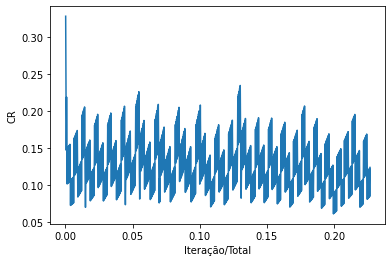

In [29]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

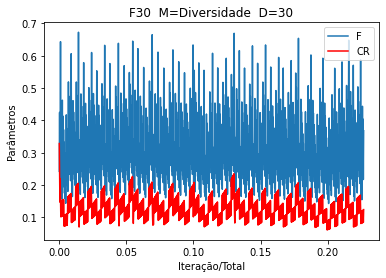

In [30]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'F30_Diversidade_D=30')

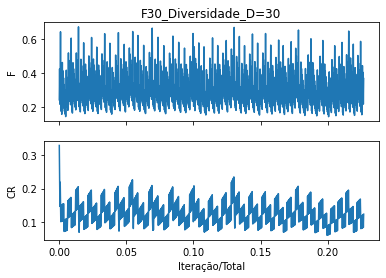

In [31]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [32]:
nome='SUB'+'_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('MCS-FRANNK','Fator F/DE= %.2f' %(fator),'NPAR=',NPAR,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1],'STD __:',STD)
print('MIN __:',MINFO, 'MAX__: ',MAXFO)
print(MEAN[-1])
print(STD)
print(MINFO)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

MCS-FRANNK Fator F/DE= 0.33 NPAR= 100 Iterações= 1000 Dim= 30 Min/Max= -100 / 100 _ F30
SUB_Fo-0.5_CRo-0.5_D-30_Interv-1000 

MÉDIA:  402106.9992904964 STD __: 485461.4127273054
MIN __: 12987.228583069813 MAX__:  2194564.3827896793
402106.9992904964
485461.4127273054
12987.228583069813
Tempo Médio= 581.637 segundos ---
50 Rodadas

BEST:  [-2.05798738e+00 -9.99723848e+01  9.99983590e+01 -4.98178201e+01
 -3.22753511e+01 -1.77146907e+01  6.33757908e+01  1.68147219e+01
  3.44744283e+01  9.65797702e+01 -1.18959005e+01  3.16396997e+01
 -1.52030529e+01  9.62872830e+00  2.22021124e+01  3.85269762e+01
 -4.52752330e+01 -6.22499708e+01  8.84623397e+00 -6.27864592e+01
  4.89422245e+01 -7.30812129e+01  8.53710968e+01 -5.05597898e+01
 -5.32912718e+01 -9.34026963e+01  3.98764802e+01  9.98712203e+01
  1.00000000e+02 -5.90645787e+01  1.29872286e+04]
